In [1]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

In [2]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

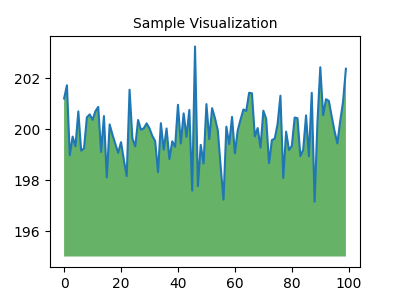

In [3]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Training data shape: (120, 4)
Test data shape: (30, 4)
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00 

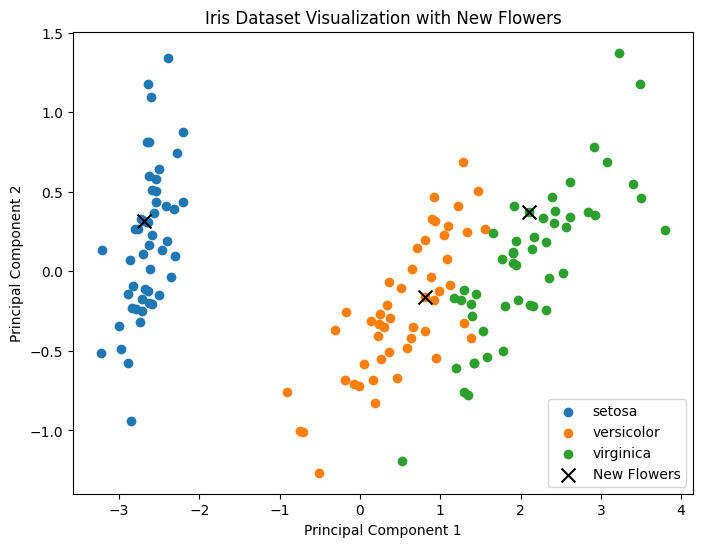

In [4]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first few rows
print(data.head())
from sklearn.model_selection import train_test_split

# Split data into features and target
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train the model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))
import numpy as np

new_flowers = np.array([
    [5.1, 3.5, 1.4, 0.2],
    [6.0, 2.9, 4.5, 1.5],
    [6.9, 3.1, 5.4, 2.1]
])

# Predict species
predictions = model.predict(new_flowers)
predicted_species = [iris.target_names[pred] for pred in predictions]

for i, species in enumerate(predicted_species):
    print(f"Flower {i+1} is predicted to be: {species}")
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the dataset
plt.figure(figsize=(8, 6))
for i, species in enumerate(iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=species)

plt.scatter(pca.transform(new_flowers)[:, 0], pca.transform(new_flowers)[:, 1],
            color='black', marker='x', s=100, label='New Flowers')

plt.title("Iris Dataset Visualization with New Flowers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()